Владимир Кирилкин ПИ18-2

ML 2.2. Оценка эффективности
https://docs.google.com/document/d/15Sy2W17NADAezX2UKZ0mDSnpD2f0Onqi0Fk0VrJv2Hw/edit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=43)

In [3]:
clf = Pipeline([
    ('svc', SVC(kernel="linear")),
])

In [4]:
def evaluate_cross_validation(clf, X, y, K):
    cv = KFold(K, shuffle=True, random_state=0).get_n_splits(len(y))
    scores = cross_val_score(clf, X, y, cv=cv)
    return np.mean(scores)

In [21]:
def calc_params(X_train, X_test, y_train, y_test, clf, alphas, parameter, K, dataset = 1):
    train_scores = []
    test_scores = []
    predictions = []

    best_id = 0
    best_sum = 0
    best_razn = 0
    print("Все возможные параметры:", ", ".join(clf.get_params().keys()))
    
    for i in range(len(alphas)):
        print(i, end=" ")
        if dataset == 1:
            clf.set_params(**{parameter: alphas[i]})
        elif dataset == 2:
            clf.set_params(clf__C=alphas[i])
        train_score = evaluate_cross_validation(clf, X_train, y_train, 3)
        train_scores.append(train_score)
        clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        predictions.append(predicted)
        test_score = clf.score(X_test, y_test)
        test_scores.append(test_score)
        if best_sum < (test_score + train_score) and best_razn < abs(train_score - test_score):
            best_id = i
            best_sum = test_score + train_score
            best_razn = train_score - test_score            
    
    plt.figure(figsize=(15, 10))
    plt.xlabel('svc__C')
    plt.ylabel('Score')
    plt.title('Поиск лучшего параметра {parameter}')
    plt.plot(alphas, train_scores, label="training scores")
    plt.plot(alphas, test_scores, label="test scores")
    plt.legend(loc="best")
    
    return train_scores, test_scores, best_id, predictions

Все возможные параметры memory, steps, verbose, svc, svc__C, svc__break_ties, svc__cache_size, svc__class_weight, svc__coef0, svc__decision_function_shape, svc__degree, svc__gamma, svc__kernel, svc__max_iter, svc__probability, svc__random_state, svc__shrinking, svc__tol, svc__verbose
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
 Трейновое: 
 [0.8668641300220248, 0.8869332421964001, 0.9020088099035467, 0.9069833675096833, 0.9145401382243487, 0.9195716564137616, 0.9296346927925875, 0.9446722867775499, 0.9421470342522973, 0.9396217817270448, 0.9471595655806181, 0.9471595655806181, 0.952191083770031, 0.957203615098352, 0.957203615098352] 
 Тестовое: 
 [0.9239766081871345, 0.9415204678362573, 0.9532163742690059, 0.9532163742690059, 0.9707602339181286, 0.9766081871345029, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9649122807017544, 0.9707602339181286, 0.9532163742690059, 0.9590643274853801, 0.9473684210526315, 0.9473684210526315]
Лучшее: 0.26826957952797276 
 Трейновое: 
 0.9471595

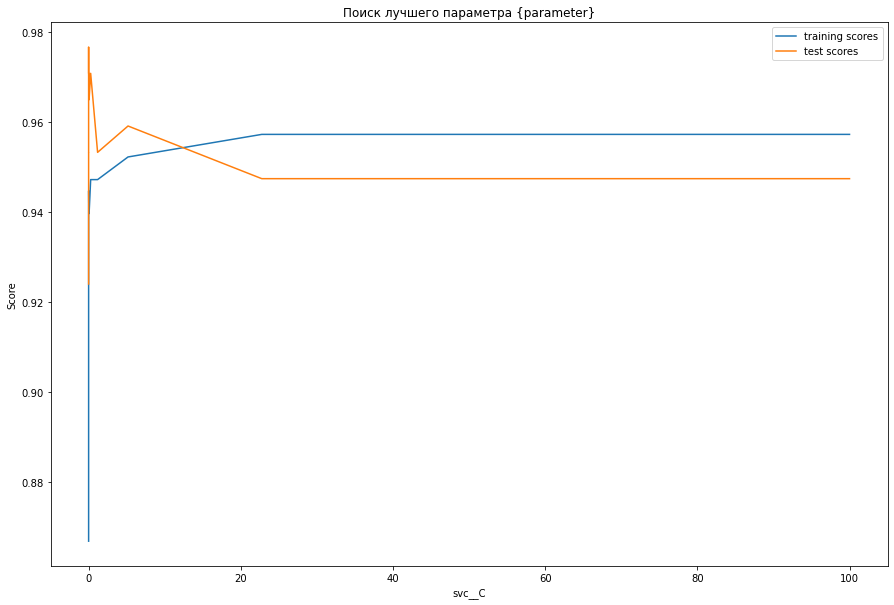

In [10]:
alphas = np.logspace(-7, 2, 15)

train_scores, test_scores, best_id, predictions = calc_params(X_train, X_test, y_train, y_test, clf, alphas, 'svc__C', 3)
print('\n Трейновое: \n', train_scores,'\n Тестовое: \n', test_scores)
print('Лучшее:', alphas[best_id], '\n Трейновое: \n', train_scores[best_id], '\n Тестовое: \n', test_scores[best_id])

### Оценка результата на нескольких метриках качества

In [30]:
clf.set_params(svc__C=1.178768634793589, svc__probability=True)
start_time = time.time()
clf.fit(X_train, y_train)
print("time:", time.time() - start_time)
predicted = clf.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, predicted))
print('precision_score:', precision_score(y_test, predicted))
print('recall_score:', recall_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted))

time: 3.0899910926818848
accuracy_score: 0.9532163742690059
precision_score: 0.9732142857142857
recall_score: 0.956140350877193
f1_score: 0.9646017699115044


Так как все показатели больше 0.95 то можно считать что модель качественная

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.99')

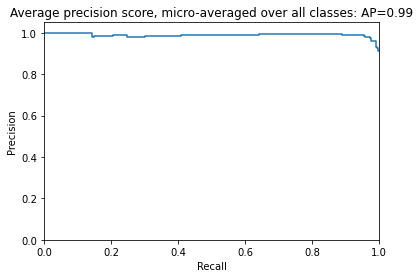

In [14]:
y_score = clf.decision_function(X)

precision, recall, _ = precision_recall_curve(y.ravel(), y_score.ravel())
average_precision = average_precision_score(y, y_score)
 
plt.step(recall, precision, where='post')
 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision))

In [15]:
print('f1_score:', f1_score(y_test, predicted))

f1_score: 0.9646017699115044


Text(0.5, 1.0, 'ROC curve')

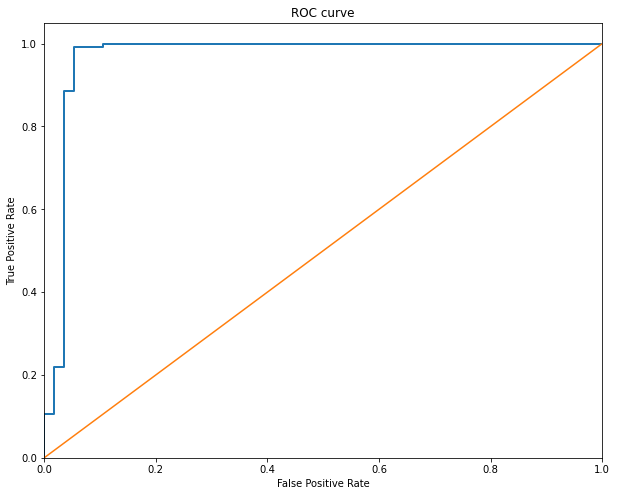

In [16]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

Так как TP быстро вырос и находится в левом верхнем углу то значит модель эффективная

Распараллеливание вычислений в RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
import time

times = []

for i in range(1,9):
    start_time = time.time()
    clf_rf = RandomForestClassifier(n_jobs=i)
    clf_rf.fit(X_train, y_train)
    times.append([i, time.time() - start_time])
    
print(times)

[[1, 0.17095685005187988], [2, 0.40358877182006836], [3, 0.15600037574768066], [4, 0.18799781799316406], [5, 0.18319201469421387], [6, 0.18616151809692383], [7, 0.16399216651916504], [8, 0.14094901084899902]]


В данном случае распараллеливание бесполезно, а в некоторых случаях и вовсе замедляет процесс обучения

Повторите анализ для другой модели (вида ядра). Сравните производительности моделей для разных метрик. Сделайте вывод о предпочтительности моделей.

In [18]:
clf_1 = Pipeline([
    ('svc', SVC(kernel="rbf")),
])

Все возможные параметры: memory, steps, verbose, svc, svc__C, svc__break_ties, svc__cache_size, svc__class_weight, svc__coef0, svc__decision_function_shape, svc__degree, svc__gamma, svc__kernel, svc__max_iter, svc__probability, svc__random_state, svc__shrinking, svc__tol, svc__verbose
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
 Трейновое: 
 [0.6105604921394395, 0.6105604921394395, 0.6105604921394395, 0.6105604921394395, 0.6105604921394395, 0.6105604921394395, 0.6105604921394395, 0.6105604921394395, 0.726171489329384, 0.8618326118326118, 0.8869522290574922, 0.8969772917141339, 0.9094896331738437, 0.9145401382243487, 0.9170464038885092] 
 Тестовое: 
 [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.8654970760233918, 0.9181286549707602, 0.935672514619883, 0.9473684210526315, 0.9590643274853801, 0.9707602339181286, 0.9766081871345029]
Лучшее: 100.0 
 Трейновое: 
 0.9170464038885092 
 

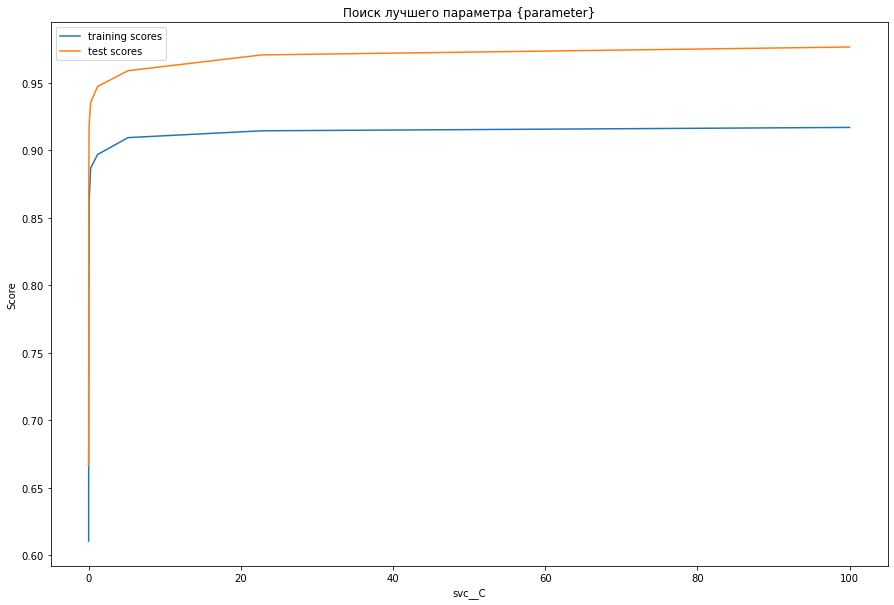

In [24]:
alphas = np.logspace(-7, 2, 15)

train_scores, test_scores, best_id, predictions = calc_params(X_train, X_test, y_train, y_test, clf_1, alphas, 'svc__C', 3)
print('\n Трейновое: \n', train_scores,'\n Тестовое: \n', test_scores)
print('Лучшее:', alphas[best_id], '\n Трейновое: \n', train_scores[best_id], '\n Тестовое: \n', test_scores[best_id])

In [29]:
clf_1.set_params(svc__C=1.178768634793589, svc__probability=True)
start_time = time.time()
clf_1.fit(X_train, y_train)
print("time:", time.time() - start_time)
predicted = clf_1.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, predicted))
print('precision_score:', precision_score(y_test, predicted))
print('recall_score:', recall_score(y_test, predicted))
print('f1_score:', f1_score(y_test, predicted))

time: 0.018996715545654297
accuracy_score: 0.9473684210526315
precision_score: 0.926829268292683
recall_score: 1.0
f1_score: 0.9620253164556963


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.98')

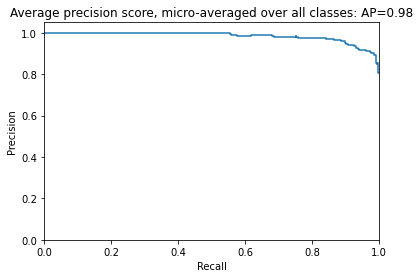

In [26]:
y_score = clf_1.decision_function(X)

precision, recall, _ = precision_recall_curve(y.ravel(), y_score.ravel())
average_precision = average_precision_score(y, y_score)
 
plt.step(recall, precision, where='post')
 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision))

In [28]:
print('f1_score:', f1_score(y_test, predicted))

f1_score: 0.9620253164556963


Text(0.5, 1.0, 'ROC curve')

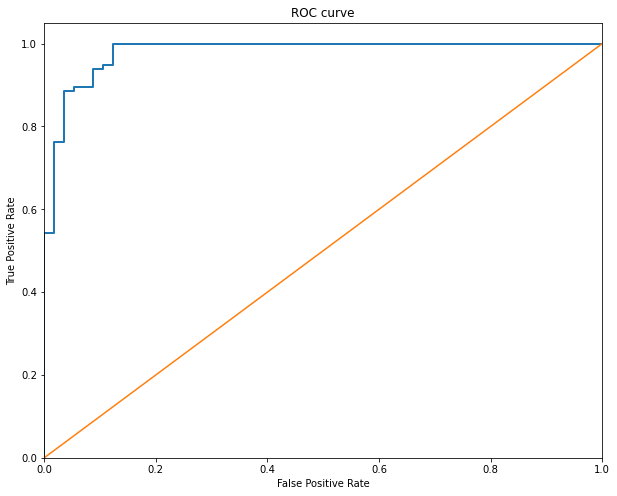

In [27]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf_1.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

| Ядро               | linear             | rbf                   |
| ------------------ |:------------------:| ---------------------:|
| time               | 3.0899910926818848 | 0.018996715545654297  |
| accuracy_score     | 0.9532163742690059 | 0.9473684210526315    |
| precision_score    | 0.9732142857142857 | 0.926829268292683     |
| recall_score       | 0.956140350877193  | 1.0                   |
| f1_score           | 0.9646017699115044 | 0.9620253164556963    |

Линейное ядро по всем характеристикам лучше, но гораздо медленнее
